In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [125]:
#----------------------------Task1-------------------------------
# Произведение ненулевых элементов на диагонали
X1 = np.array([[1, 2], [2, 1]])
X2 = np.array([[1, 0, 1],[2, 0, 2],[3, 0, 3],[4, 4, 4]])
X3 = np.ones((20, 20))
X4 = np.random.randint(low=0, high=1000, size=((100,100)))

In [135]:
def task1_v1(X):
    X_d = X.diagonal()
    X_d_0 = d[d.nonzero()]
    res = X_d_0.prod()
    return res


def task1_v2(X):
    X_d = X.diagonal()
    res = X_d.prod(where=[X_d!=0])
    return res


def task1_v3(X):
    X_d = X.diagonal()
    X_d_0 = X_d[X_d!=0]
    res = np.multiply.reduce(X_d_0)
    return res


def task1_v4(X):
    res = 1
    for i in range (len(X)):
        for j in range (len(X[i])):
            if i==j and X[i][j] != 0:
                res *= X[i][j]    
    return res            

In [152]:
%%timeit
task1_v1(X4)

23.4 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [161]:
%%timeit
task1_v2(X4)

41.4 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [165]:
%%timeit
task1_v3(X3)   

27.3 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [157]:
%%timeit
task1_v4(X3)   

186 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [272]:
task1_test_results = [[[1, 2, 3, 4], [23.7, 24.5, 23.6, 23.4]], #v1
                      [[1, 2, 3, 4], [39.5, 39.3, 41.5, 41.4]], #v2
                      [[1, 2, 3, 4], [27.2, 26.8, 29.2, 27.3]], #v3
                      [[1, 2, 3, 4], [16.5, 23.8, 181, 200]] #v4 (200 - условный результат для графика, на самом деле гораздо больше)
                     ]

In [63]:
def draw_plot(test_results):
    fig, ax = plt.subplots()
    colors = ['teal', 'violet', 'blue', 'brown']
    for i in range (len(test_results)):
        ax.plot(test_results[i][0], test_results[i][1], 
                label=f'v{i+1}', marker = 'o', markersize = 4, color = colors[i])
    fig.set_figwidth(8)
    fig.set_figheight(6)
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

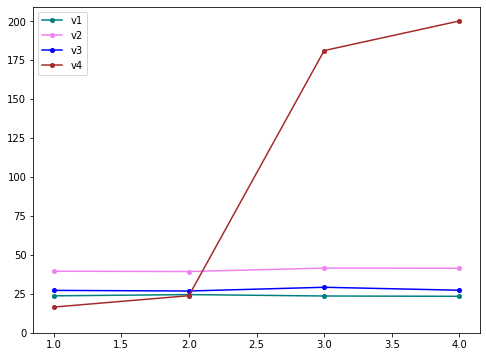

In [274]:
draw_plot(task1_test_results)

In [ ]:
#----------------------------Task2-------------------------------
# Дана матрица X и два вектора одинаковой длины i и j. 
# Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]])

In [238]:
X1 = {'matrix' : np.array([[11, 12], [21, 22]]),
      'vi' : np.array([1, 0]),
      'vj' : np.array([0, 0])}

X2 = {'matrix' : np.array([[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]]),
      'vi' : np.array([1, 2, 3]),
      'vj' : np.array([3, 1, 0])}

X3 = {'matrix' : np.ones((100, 100)),
      'vi' : np.random.randint(low=0, high=99, size=((10))),
      'vj' : np.random.randint(low=0, high=99, size=((10)))}

In [248]:
def task2_v1(M, vi, vj):
    return M[vi, vj]


def task2_v2(M, vi, vj):
    M2 = M[vi] 
    res = np.array([])
    for i in range (len(M2)):
        res = np.append(res, M2[i][vj[i]])
    return res 


def task2_v3(M, vi, vj):
    res = np.array([])
    for i in range (len(vi)):
        res = np.append(res, M[vi[i]][vj[i]])
    return res    

In [276]:
%%timeit
Xn = X3
task2_v3(Xn['matrix'], Xn['vi'], Xn['vj'])

435 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [281]:
task2_test_results = [[[1, 2, 3], [8.62, 8.7, 9.1]], #v1
                      [[1, 2, 3], [110, 149, 441]], #v2
                      [[1, 2, 3], [99.4, 139, 435]], #v3
                     ]   

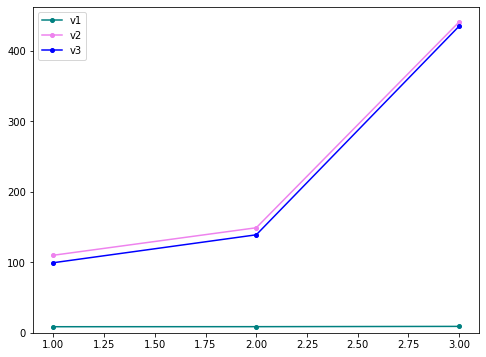

In [282]:
draw_plot(task2_test_results)

In [ ]:
#----------------------------Task3-------------------------------
# Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество

In [489]:
X1 = {'x' : np.array([627]),
      'y' : np.array([6, 2])} 

X2 = {'x' : np.array([1, 2, 2, 3]),
      'y' : np.array([4, 2, 1, 2])} 

arr = np.random.randint(low=0, high=1000, size=(10))
X3 = {'x' : arr,
      'y' : arr[::-1]} 

In [460]:
def task3_v1(x, y):
    return (np.sort(x)==np.sort(y)).all()


def task3_v2(x, y):
    for i in set(x):
        if (np.sum(x==i) != np.sum(y==i)):
            return False
    return True


def task3_v3(x, y):
    y = y.tolist()
    x = x.tolist()
    for x_el in x:
        if (x_el in y):
            y.remove(x_el)
        else:    
            return False    
    if (len(y)!=0):
        return False
    return True

In [490]:
%%timeit
Xn = X3
task3_v3(Xn['x'], Xn['y'])

21.2 µs ± 409 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [491]:
task3_test_results = [[[1, 2, 3], [53.3, 51.5, 54.8]], #v1
                      [[1, 2, 3], [88.7, 240, 815]],   #v2
                      [[1, 2, 3], [1.47, 2.65, 8.79]], #v3
                     ]  

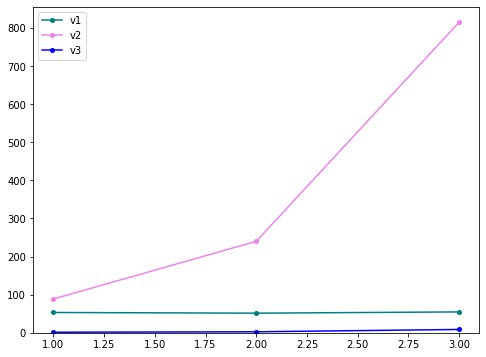

In [492]:
draw_plot(task3_test_results)

In [ ]:
#----------------------------Task4-------------------------------
# Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой

In [601]:
X1 = np.array([2, 0, 3, 0, 0, 5])
X2 = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0, 3, 10, 8, 0, 4])
X3 = np.random.randint(low=0, high=10, size=(30))
X4 = np.random.randint(low=0, high=10, size=(100))

In [598]:
def task4_v1(X):
    nulls = np.argwhere(X==0)
    if (nulls[-1]==len(X)-1):
        np.delete(nulls, len(nulls)-1)
    return (X[nulls+1]).max()


def task4_v2(X):
    max=''
    for i in range(len(X)-1):
        if (X[i]==0):
            if (max=='' or X[i+1]>max):
                max = X[i+1]
    return max


def task4_v3(X):
    nulls = X==0
    return X[1:][nulls[:-1]].max()

In [615]:
%%timeit
task4_v3(X4)

35.2 µs ± 752 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [618]:
task4_test_results = [[[1, 2, 3, 4], [91.9, 93.2, 94.1, 91.9]], #v1
                      [[1, 2, 3, 4], [74.6, 138, 97.4, 463]], #v2
                      [[1, 2, 3, 4], [35.4, 35.8, 35, 35.2]], #v3
                     ]  

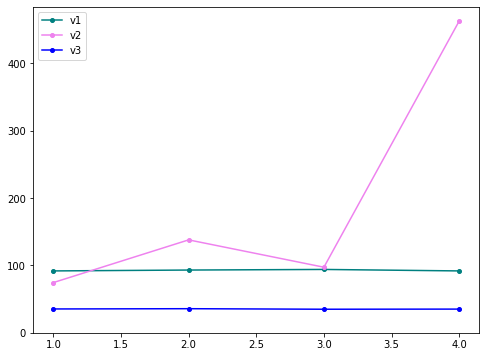

In [619]:
draw_plot(task4_test_results)

In [ ]:
#----------------------------Task5-------------------------------
# Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), 
# а также вектор длины numChannels. 
# Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). 
# Считать реальное изображение можно при помощи функции scipy.misc.imread 
# (если изображение не в формате png, установите пакет pillow: conda install pillow). 
# Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [1]:
import imageio

In [163]:
image1 = imageio.imread('./images/1.png')
image2 = imageio.imread('./images/2.png')
image3 = imageio.imread('./images/3.png')

In [164]:
channels = np.array([0.299, 0.587, 0.114])

In [165]:
def task5_v1(image):
    new_image = np.around(np.dot(image.T[0], channels[0])+
                          np.dot(image.T[1], channels[1])+
                          np.dot(image.T[2], channels[2]), 0)
    return new_image.T


def task5_v2(image):
    matrix_red = image.T[0].T
    matrix_green = image.T[1].T
    matrix_blue = image.T[2].T
    new_image = np.around(matrix_red*channels[0]+matrix_green*channels[1]+matrix_blue*channels[2], 0)
    return new_image


def task5_v3(image):
    new_image = np.zeros((image.shape[0], image.shape[1]))    
    for i in range (len(channels)):
        matrix = image.T[i].T
        for j in range (len(matrix)):
            for k in range (len(matrix[0])):
                new_image[j][k] += matrix[j][k]*channels[i]    
    return np.around(new_image, 0)         

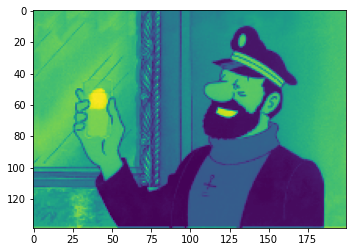

In [167]:
plt.imshow(new_image)

In [176]:
%%timeit
task5_v3(image3)

2.87 s ± 8.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [185]:
task5_test_results = [[[1, 2, 3], [321, 357, 1460]], #v1
                      [[1, 2, 3], [314, 344, 1200]], #v2
                      [[1, 2, 3], [2910, 9080, 28700]], #v3 (меньшие порядки для наглядности)
                     ]  

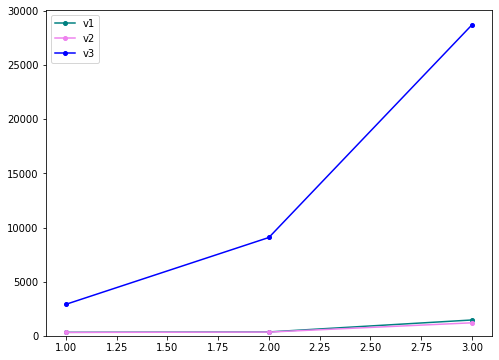

In [186]:
draw_plot(task5_test_results)

In [ ]:
#----------------------------Task6-------------------------------
# Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. 
# Необходимо вернуть кортеж из двух векторов одинаковой длины. 
# Первый содержит числа, а второй - сколько раз их нужно повторить

In [4]:
from itertools import groupby

In [45]:
X1 = np.array([1, 2, 1])
X2 = np.array([2, 2, 2, 3, 3, 3, 5, 6])
X3 = np.ones(20)
X4 = np.random.randint(low=0, high=1, size=(100))

In [41]:
def task6_v1(x):
    if len(x) == 0: 
        return ([], [])
    vals = np.append(np.where(x[1:] != x[:-1]), len(x)-1)
    lens = np.diff(np.append(-1, vals))
    return(x[vals], lens)
    
    
def task6_v2(x):
    vals = [b for b, g in groupby(x) if b]
    lens = [len(list(g)) for b, g in groupby(x) if b]
    return vals, lens 


def task6_v3(x):
    vals = np.array([x[0]])
    lens = np.array([1])
    start = 0;
    for i in range (1, len(x)):
        if (x[i]==x[i-1]):
            lens[start]+=1
        else:
            vals = np.append(vals, x[i])
            lens = np.append(lens, 1)
            start+=1
    return vals, lens        

In [59]:
%%timeit
task6_v3(X4)

302 µs ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
task6_test_results = [[[1, 2, 3, 4], [121, 122, 120, 121]],     #v1
                      [[1, 2, 3, 4], [23.7, 30.8, 32.2, 93.3]], #v2
                      [[1, 2, 3, 4], [164, 247, 77.1, 302]],    #v3
                     ] 

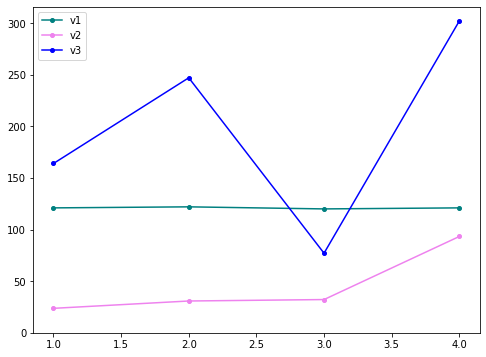

In [64]:
draw_plot(task6_test_results)

In [ ]:
#----------------------------Task7-------------------------------
# Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. 
# Сравнить с функцией scipy.spatial.distance.cdist

In [236]:
X1 = {'x' : np.array([[0, 6], [0, 0]]),
      'y' : np.array([[2, 2], [1, 1]])} 

X2 = {'x' : np.array([[0, 6, 0, 5], [0, 0, 0, 6]]),
      'y' : np.array([[2, 2, 2, 55], [1, 1, 1, 6]])} 

X3 = {'x' : np.random.randint(low=0, high=100, size=(2,10)),
      'y' : np.random.randint(low=0, high=100, size=(2,10))} 

X4 = {'x' : np.random.randint(low=0, high=100, size=(2,30)),
      'y' : np.random.randint(low=0, high=100, size=(2,30))} 

In [112]:
from scipy.spatial import distance

In [247]:
def task7_v1(X, Y):
    def dist(x, y):
        return np.linalg.norm(x-y)
    dist_vect = np.vectorize(dist, signature='(n),(n)->()')
    for x in X:
        yield dist_vect(Y, x)


def task7_v2(X, Y):
    vals = np.array([])
    for x in X:
        for y in Y:
            vals = np.append(vals, np.sqrt(np.dot(x-y, x-y)))
    return vals.reshape(X.shape[0], Y.shape[0])     


def task7_v3(X, Y):
    return distance.cdist(X, Y, 'euclidean')

In [251]:
%%timeit
Xn = X4
task7_v3(Xn['x'], Xn['y'])

72.7 µs ± 711 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [253]:
task7_test_results = [[[1, 2, 3, 4], [0.705, 0.718, 0.725, 0.716]], #v1
                      [[1, 2, 3, 4], [315, 317, 318, 321]],         #v2
                      [[1, 2, 3, 4], [71.9, 71.6, 75.5, 72.7]],     #v3
                     ] 

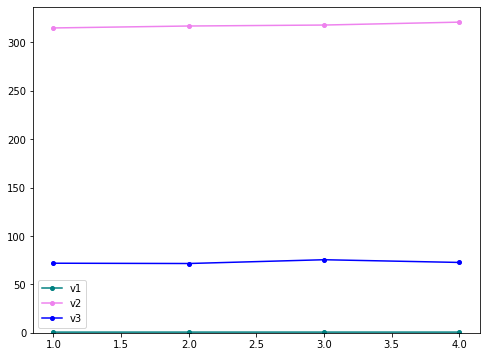

In [254]:
draw_plot(task7_test_results)

### Выводы

- Встроенные функции numpy, как правило, работают быстрее и тратят одинаковое время на малые и большие входные данные.
- Вычисления через цикл работают быстрее с маленькими данными, однако с увеличением данных время работы многократно возрастает.
- where=[условие] не так эффективна, как nonzero()
- Время работы numpy не зависит от содержания входных данных, в отличие от алгоритмов с перебором (см. Задания 4 и 6)
- Объявление подолнительных переменных для улучшения читаемости не сильно сказывается на производительности (Задание 5).